In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats



input_file_dir = "C:/Users/sherm/Desktop/workspace/미드프로젝트/data/raw/"
output_file_dir = "C:/Users/sherm/Desktop/workspace/미드프로젝트/data/processed/"

### 경찰청 운전면허 행정 처분 현황

In [66]:
temp_2023=pd.read_csv(input_file_dir + "경찰청_운전면허 행정처분 현황_20231231.csv", encoding="euc-kr")
temp_10_18=pd.read_csv(input_file_dir + "경찰청_운전면허 행정처분 현황_2010~2018.csv", encoding="euc-kr")

In [68]:
temp_10_18

,구분,운전면허 정지,적성검사미필 취소,점수초과 취소,행정처분 기간 중 운전 취소,교통사고 야기도주 취소,기타 취소
0,2010,330849,100862,157774,4540,7453,16075
1,2011,269624,77320,138059,3230,7008,15345
2,2012,157892,34501,131786,1701,7382,10552
3,2013,194774,25290,144146,2629,6195,15461
4,2014,209030,35300,137125,2412,5578,18866
5,2015,198714,40246,133060,2173,5468,22822
6,2016,211626,52943,126938,4480,4718,21188
7,2017,172879,47626,120591,3499,4178,23344
8,2018,73824,44852,101712,1253,4262,30613


In [13]:
year_drink=temp[['연도','음주운전 등 운전면허 정지']]

In [26]:
year_drink

,연도,음주운전 등 운전면허 정지
0,2010,330849
1,2011,269624
2,2012,157892
3,2013,194774
4,2014,209030
5,2015,198714
6,2016,211626
7,2017,172879
8,2018,73824
9,2019,54572


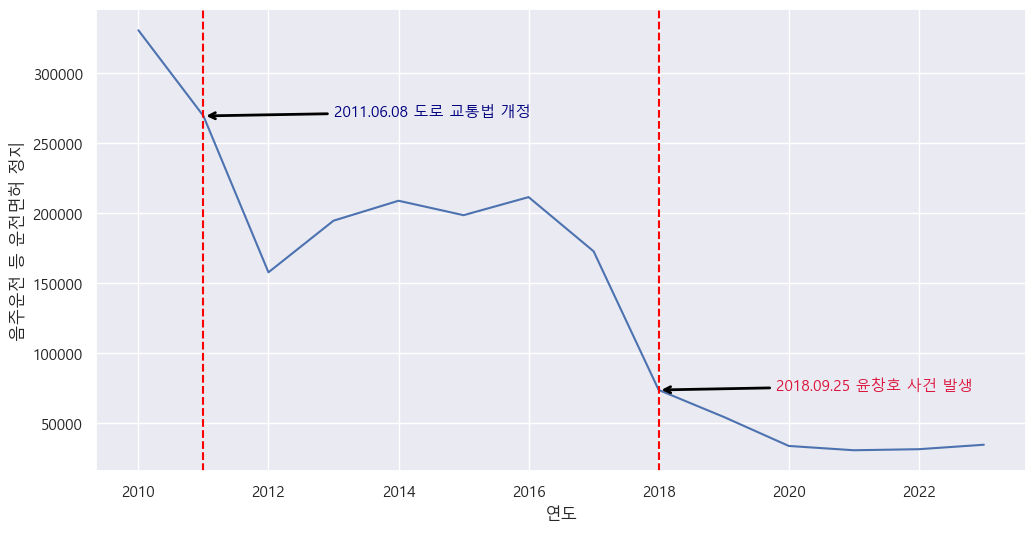

In [38]:
sns.lineplot(x="연도", y='음주운전 등 운전면허 정지', data=year_drink)
#2011년도 도로교통법 개정
plt.axvline(x=2011, color='red', linestyle='--')
plt.annotate(
    text='2011.06.08 도로 교통법 개정',
    xy=(2011, 269624),               # 실제 화살표가 가리킬 지점
    xytext=(2013, 269624),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='navy'
)

#2018
plt.axvline(x=2018, color='red', linestyle='--')
plt.annotate(
    text='2018.09.25 윤창호 사건 발생',
    xy=(2018, 73824),               # 실제 화살표가 가리킬 지점
    xytext=(2019.8, 73824),           # 텍스트가 위치할 지점
    arrowprops={
        "arrowstyle" : '->',
        "color" : 'black',
        "linewidth" : 2
    },
    fontsize=11,
    color='crimson'
)

plt.show()

### 재발률 확인

### 음주_교통사고

In [54]:
df=pd.read_excel(input_file_dir + "음주_교통사고_05-09.xls", header=[0, 1])
df.columns = ['{}_{}'.format(str(x), str(y)).strip() if x != y else x for x, y in df.columns ]

In [63]:
df=pd.read_excel(input_file_dir + "음주_교통사고_15-19.xls", header=[0, 1])
df.columns = ['{}_{}'.format(str(x), str(y)).strip() if x != y else x for x, y in df.columns ]

In [64]:
df

,시도,시군구,2015_사고[건],2015_사망[명],2015_부상[명],2015_(중상자[명]),2016_사고[건],2016_사망[명],2016_부상[명],2016_(중상자[명]),...,2017_부상[명],2017_(중상자[명]),2018_사고[건],2018_사망[명],2018_부상[명],2018_(중상자[명]),2019_사고[건],2019_사망[명],2019_부상[명],2019_(중상자[명])
0,합계,합계,24399.0,583.0,42880.0,9716.0,19769.0,481.0,34423.0,7362.0,...,33364.0,7136.0,19381,346,32952,6721,15708.0,295.0,25961.0,5043.0
1,합계,종로구,68.0,0.0,100.0,23.0,77.0,0.0,121.0,25.0,...,144.0,25.0,63,0,110,18,48.0,0.0,78.0,10.0
2,합계,중구,57.0,0.0,131.0,34.0,51.0,0.0,97.0,23.0,...,66.0,15.0,70,1,104,25,30.0,0.0,42.0,10.0
3,합계,용산구,135.0,4.0,246.0,59.0,118.0,1.0,201.0,43.0,...,180.0,41.0,100,0,183,46,73.0,1.0,127.0,20.0
4,합계,성동구,88.0,2.0,135.0,24.0,80.0,1.0,136.0,21.0,...,160.0,31.0,85,1,156,32,61.0,0.0,92.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,경남,창원시(통합),398.0,11.0,687.0,213.0,255.0,11.0,444.0,107.0,...,374.0,96.0,245,7,406,111,212.0,8.0,336.0,77.0
473,제주,합계,466.0,8.0,766.0,185.0,365.0,5.0,589.0,116.0,...,496.0,94.0,322,2,551,102,296.0,4.0,489.0,102.0
474,제주,제주시,341.0,4.0,556.0,140.0,227.0,0.0,387.0,64.0,...,339.0,58.0,216,1,352,52,201.0,2.0,328.0,49.0
475,제주,서귀포시,125.0,4.0,210.0,45.0,138.0,5.0,202.0,52.0,...,157.0,36.0,106,1,199,50,95.0,2.0,161.0,53.0


In [65]:
df.to_csv(output_file_dir +"음주_교통사고_15-19.csv",index=False)

### 면허 취득 견과 년수별 음주 음전 사고 발생 건수 및 구성비
- 나이대가 없음 운전면허 비율에 대해서 나오는거라 되게 애매

In [60]:
df=pd.read_excel(input_file_dir + "면허취득경과년수별 음주운전사고 발생건수 및 구성비.xls")

In [61]:
df #

,연도,구분,전체,소계(5년미만),1년 미만,1~2년,2~3년,3~4년,4~5년,5~10년,10년 이상,기타
0,2005,건수,26460,8869.0,1735.0,1395.0,2100.0,1905.0,1734.0,6050.0,8521.0,3020.0
1,2005,비율,100,33.5,6.6,5.3,7.9,7.2,6.6,22.9,32.2,11.4
2,2006,건수,29990,10301.0,1993.0,1912.0,1663.0,1594.0,3139.0,6934.0,9402.0,3353.0
3,2006,비율,100,34.3,6.6,6.4,5.5,5.3,10.5,23.1,31.4,11.2
4,2007,건수,28416,8892.0,1695.0,1781.0,1622.0,1099.0,2695.0,7064.0,9103.0,3357.0
5,2007,비율,100,31.3,6.0,6.3,5.7,3.9,9.5,24.9,32.0,11.8
6,2008,건수,26873,7604.0,1653.0,1466.0,1490.0,1225.0,1770.0,7034.0,9130.0,3105.0
7,2008,비율,100,28.3,6.2,5.5,5.5,4.6,6.6,26.2,34.0,11.5
8,2009,건수,28207,7910.0,1862.0,1687.0,1358.0,1585.0,1413.0,7213.0,10329.0,2755.0
9,2009,비율,100,28.0,6.6,2.0,4.8,5.6,5.0,25.6,36.6,9.8
